In [6]:
import numpy as np
import pandas as pd
import random
import pylab
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
def compute_cost_function(m, t0, t1, x, y):
  return 1/2/m * sum([(t0 + t1* np.asarray([x[i]]) - y[i])**2 for i in range(m)])

In [8]:
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = 0
    t1 = 0

    # total error, J(theta)
    J = compute_cost_function(m, t0, t1, x, y)
    print('J=', J);
    # Iterate Loop
    num_iter = 0
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i])*np.asarray([x[i]]) for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = compute_cost_function(m, t0, t1, x, y)
        print ('J = ', e)
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True

    return t0,t1

In [9]:
def plot_cost_function(x, y, m):
    t0 = list(range(0, x.shape[0]))
    j_values = []
    for i in range(len(t0)):
        j_values.append(compute_cost_function(m, i, i, x, y)[0])
    print ('j_values', len(j_values), len(x), len(y))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, y, j_values, label='parametric curve')
    ax.legend()
    plt.show()

J= [4.8]
J =  [3.785392]
J =  [2.99665611]
J =  [2.38350825]
J =  [1.90685869]
J =  [1.53631993]
J =  [1.24826938]
J =  [1.02434337]
J =  [0.85026638]
J =  [0.71494094]
J =  [0.6097401]
Max interactions exceeded!
theta0 = [0.17056254] theta1 = [0.6049785]


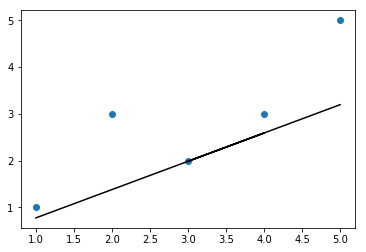

Done!


In [10]:
if __name__ == '__main__':
  
    df = pd.read_csv('1.txt', names=['x','y'])
    x = df['x']
    y = df['y']
     
    alpha = 0.01 # learning rate
    ep = 0.0001 # convergence criteria

    # call gredient decent, and get intercept(=theta0) and slope(=theta1)
    theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=10)
    print ('theta0 = ' + str(theta0)+' theta1 = '+str(theta1))
    # plot_cost_function(x, y, x.shape[0])

    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

    pylab.plot(x,y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print ("Done!")